In [70]:
import pandas as pd
import matplotlib.pyplot as plt

In [71]:
commits = pd.read_csv("github-commit.csv.gz")
commits
commits.committertime = pd.to_datetime(commits.committertime * 1000000000, utc = True)
commits.authortime = pd.to_datetime(commits.authortime * 1000000000, utc = True)


In [72]:
a = commits[["authortime"]].groupby([commits.authortime.dt.strftime('%Y'),commits.authortime.dt.strftime('%m')]).count()
a.columns = ["count"]
a.index.names = ["year","month"]
a = a.reset_index()
a = a.pivot(index="year",columns="month",values="count")
a = a.fillna(0)

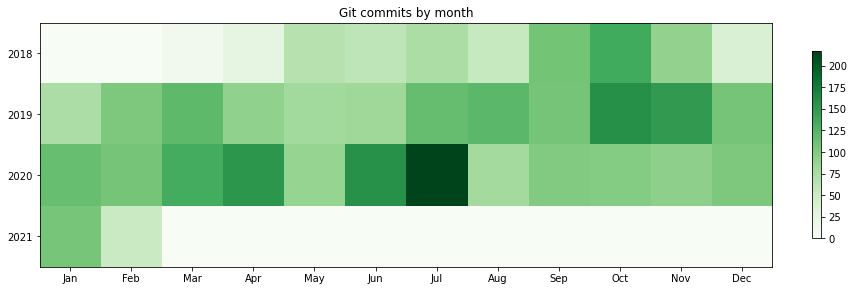

In [73]:
plt.figure(figsize=(14,11))
im = plt.imshow(a, cmap="Greens")
plt.yticks(range(len(a)),a.index.values)
plt.xticks(range(12), ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"])
plt.title("Git commits by month")
plt.colorbar(im, fraction=0.012)
plt.show()


In [74]:
a = commits[["authortime"]].groupby([commits.authortime.dt.strftime('%A'),commits.authortime.dt.strftime('%H')]).count()
a.columns = ["count"]
a.index.names = ["day","hour"]
a = a.reset_index()
a = a.pivot(index="day",columns="hour",values="count")
a = a.fillna(0)
a = a.reindex(["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])


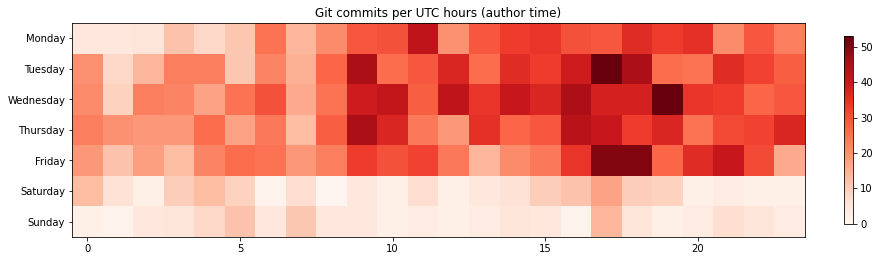

In [75]:
plt.figure(figsize=(14,11))
im = plt.imshow(a, cmap="Reds")
plt.yticks(range(len(a)),a.index.values)
plt.title("Git commits per UTC hours (author time)")
plt.colorbar(im, fraction=0.012)
plt.show()
